# Experimentation with different numbers of trial utterances
## ASV evaluation with the anonymized audiofiles by increasing the number of trial utterances
1. The number of trial utterances is gradually increased for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. 5 different files) to avoid bias
3. The speakers with less than the minimum number of utterances are filtered out
4. The number of enrollment utterances is fixed to 20 (but randomly selected to avoid bias)

<b> Hypothesis</b>: The EER of the ASV system will decrease, as the number of trial utterances increases. A greater number of trial data per speaker leads to more robust voice models that efficiently capture the trial speakers' unique voice characteristics, thereby increasing the system's ability to accept or reject the speaker correctly. <br>

The following VC-Models are evaluated:
1. StarGan-VC
2. kNN-VC


The following datasets from LibriSpeech are evaluated:
1. ls-test-clean and ls-test-other
2. ls-train-other-500

In [37]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



# Experimentation with the StarGAN-VC model


### 1. Evaluation with ls-test-clean and ls-test-other (60 out of 73 speakers)
The speakers with less than 50 utterances are filtered out. We run the experiments for 5 different target selections (files).

In [38]:
file_pattern = "results_stargan_trial/ls-test-clean_other/stargan_tco_num_trial#*.txt" 

##### Individual Evaluation

In [39]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_trials')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_trials')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)
    



Statistics for file: 1716131354


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              29.915254  2.172982     26.256575  0.840374
2              30.412040  1.369442     19.348334  0.952397
3              28.836937  2.367276     17.320281  2.088210
4              28.649912  1.502249     16.934541  2.089089
5              28.781414  1.780918     17.063121  0.762482
6              27.106955  1.958067     15.824079  0.892189
7              26.843951  2.102089     16.645237  1.205785
8              28.641146  1.086626     15.403273  1.677424
9              29.611338  1.231849     15.458796  1.439235
10             26.452367  1.706420     16.545880  2.097340
11             28.743425  1.467163     13.874927  0.923848
12             28.842782  1.884664     14.266511  0.966040
13             28.950906  1.605174     13.284629  0.956033
14             27.264757  1.115880     15.049679  2.170780
15             28.103448  1.750424     14.140853  1.119719
16             27.302747  2.844254     14.739918  1.405782
17             27.717709  2.081975     13.965517  0.688782
18             28.673290  0.928286     14.473992  1.140040
19             27.185856  1.720221     14.430158  1.927966
20             28.205728  1.924530     14.798364  0.951163
21             25.873758  1.335735     14.246055  0.572832
22             26.601403  0.447212     13.497954  2.402786
23             26.195207  2.172682     14.006429  1.227118
24             28.822326  1.524930     15.312683  1.030747
25             27.539451  3.112119     13.147282  0.994291
26             27.472238  1.451252     14.871420  1.189115
27             27.410871  1.400442     14.105786  1.125813
28             27.545295  1.917050     14.307423  1.338569
29             28.246639  2.569943     14.812975  0.702971
30             27.343659  2.323125     13.030392  1.114942


Statistics for file: 1712187226


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              35.382817  1.368818     22.796610  1.803284
2              32.507306  1.778909     16.899474  1.787833
3              32.022209  2.758964     17.562829  3.424622
4              31.618936  2.503127     16.852718  3.225841
5              32.247224  1.139075     15.356517  0.463435
6              32.317358  0.904924     15.622443  0.685753
7              33.822326  1.482111     15.584454  1.606835
8              31.531268  2.013610     14.623027  1.613392
9              32.548217  1.269531     14.827586  2.182388
10             31.256575  1.134493     14.248977  1.411012
11             31.358854  1.289876     13.921683  2.403563
12             31.478667  2.045420     14.354179  1.201804
13             31.171829  2.399589     13.147282  1.694581
14             31.148451  2.726912     13.486265  2.110188
15             32.565751  2.403963     13.240795  1.529396
16             30.715956  1.611009     12.630041  2.162493
17             32.448860  3.826949     13.483343  1.731348
18             31.700760  0.600186     11.811806  1.075924
19             30.081823  1.282739     12.583285  0.889577
20             31.829340  0.892345     14.216832  1.790351
21             31.402688  0.966858     12.866745  1.743672
22             32.042665  1.721412     12.781999  1.476447
23             31.277031  1.276616     10.771479  2.250417
24             32.916423  1.501005     11.551724  2.777723
25             30.625365  1.102406     12.291058  0.740249
26             31.659848  0.721407     12.337814  1.076916
27             30.742256  1.160291     11.876096  1.870462
28             31.697838  1.969514     11.715371  1.714683
29             30.011689  1.603657     12.361192  1.266812
30             30.929281  1.101989     11.588778  0.657730


Statistics for file: 1712004865


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              37.054354  1.619257     22.630041  1.359930
2              36.347165  1.816208     19.023963  2.182256
3              34.234366  1.499105     16.458212  2.918002
4              32.796610  2.746438     17.454705  1.337899
5              34.339568  2.850192     17.136178  0.864011
6              35.400351  2.179133     13.617767  0.448570
7              33.433665  3.428117     13.068381  1.099332
8              34.094097  2.407938     14.438925  2.166162
9              34.018118  2.461228     12.834600  1.042619
10             32.261835  1.367429     12.948568  0.863269
11             33.030392  1.918892     13.229106  1.544233
12             32.080655  1.120538     12.098188  1.366570
13             32.852133  1.893017     11.426067  1.067128
14             34.655172  1.657289     12.323203  1.174583
15             32.653419  2.383919     10.827002  1.616420
16             33.661601  0.855943     11.440678  1.155774
17             33.161894  1.330137     10.908825  1.010646
18             34.792519  1.599304     10.087668  1.371389
19             32.855056  1.648221     10.829924  0.656649
20             32.346581  2.380738     10.879603  0.650049
21             33.068381  1.533683     11.540035  1.754590
22             32.843366  1.375617     11.443600  1.244943
23             32.045587  2.032274      9.663939  2.013891
24             32.273524  1.908092     10.195792  1.702124
25             35.280538  1.556180     10.867914  1.107642
26             32.700175  1.160337     10.996493  1.760184
27             34.076563  1.530896      9.988311  1.070155
28             32.402104  2.094794     10.789012  1.491058
29             32.738165  3.144097     10.473407  1.232664
30             31.469901  1.215396     11.203974  1.257399


Statistics for file: 1712187221


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              35.794857  1.660667     23.407364  2.275830
2              35.917592  3.093317     17.942724  1.412245
3              33.705435  1.910412     17.048510  2.016772
4              33.693746  0.363085     16.890707  2.439568
5              32.565751  0.795439     16.034483  1.931313
6              33.439509  1.304204     13.626534  0.444699
7              31.732905  2.388237     13.480421  1.963543
8              34.275278  1.513963     14.400935  2.792536
9              31.607247  1.448197     12.901812  2.339594
10             34.175921  1.429710     13.077148  1.880837
11             32.258913  1.933489     12.668030  1.028155
12             33.886616  2.016322     13.658679  0.921349
13             33.585622  1.895412     11.975453  1.181831
14             33.454120  3.337557     11.545880  0.973185
15             32.942724  1.607134     13.579778  2.008105
16             32.974868  0.808616     12.533606  1.703753
17             32.554062  2.092306     13.030392  1.866978
18             32.615430  1.573533     12.986558  1.525168
19             32.063121  2.631737     11.236119  1.357164
20             32.691409  0.799869     11.586791  2.666079
21             32.618352  1.452987     11.624781  1.636098
22             34.438925  2.151318     12.071888  1.373753
23             32.220923  3.004014     11.911163  1.608655
24             33.503799  1.780996     11.428989  1.176979
25             32.416715  2.127207     12.469316  1.283662
26             32.142022  2.033062     12.147867  1.289139
27             32.767387  1.164955     12.188778  1.398359
28             32.592051  2.353052     10.558153  0.804460
29             32.302747  1.562437     10.905903  1.363153
30             32.253068  1.118250     11.090006  1.546215


Statistics for file: 1712187135


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              37.276447  1.468400     22.866745  1.486161
2              36.893629  2.844524     20.303916  2.966418
3              36.756283  1.437514     17.931034  2.468914
4              36.873174  2.487355     14.824664  3.471040
5              35.102279  0.636189     14.158387  1.933533
6              36.317943  1.782182     14.208065  1.426406
7              36.788428  2.286602     14.140853  2.128331
8              36.382233  1.895114     15.388662  0.537292
9              37.840444  1.526951     13.436587  2.142757
10             36.221508  0.971022     14.453536  0.799789
11             35.724722  0.966560     13.138515  1.254594
12             34.780830  1.159767     12.554062  1.929123
13             34.874342  1.626702     11.408533  1.378872
14             35.195792  2.089866     11.598480  1.394805
15             36.855640  1.109144     12.837522  2.374255
16             35.464641  2.012931     13.243717  2.116618
17             34.383402  1.395532     12.592051  2.095655
18             35.002922  2.479639     11.899474  0.830832
19             36.402688  2.705813     12.396259  1.612505
20             36.244886  1.435061     12.796610  1.248197
21             34.991233  1.971703     12.545295  1.878384
22             37.203390  2.012507     13.118060  1.067598
23             33.828171  2.499402     12.478083  0.645550
24             36.040327  1.833435     11.960842  0.987677
25             35.131502  1.545787     12.320281  1.008468
26             36.087084  1.300302     11.861485  1.744645
27             35.067212  0.851541     12.285213  0.693569
28             36.651081  1.643584     12.632963  0.847873
29             35.689655  2.826163     11.285798  1.122917
30             36.170660  0.817874     12.925190  1.484853

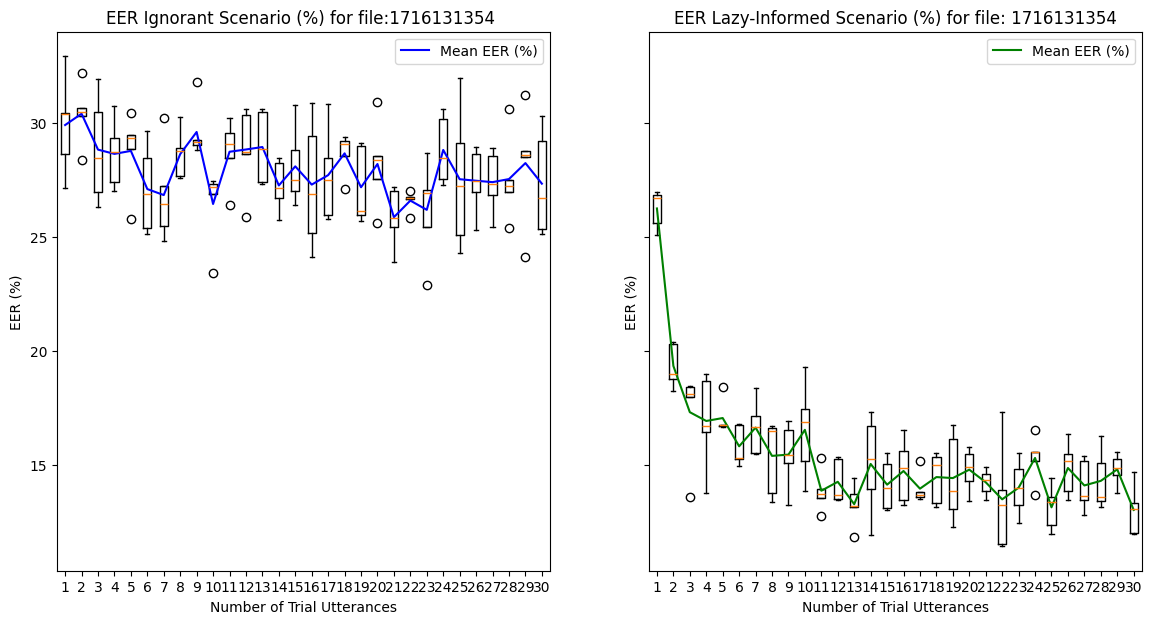

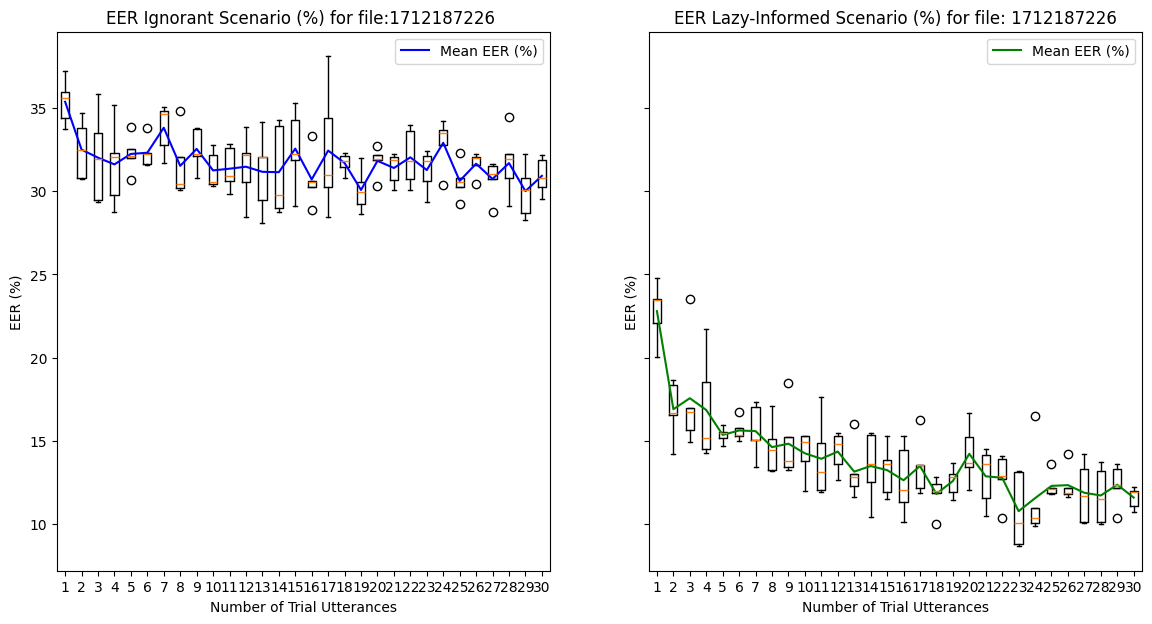

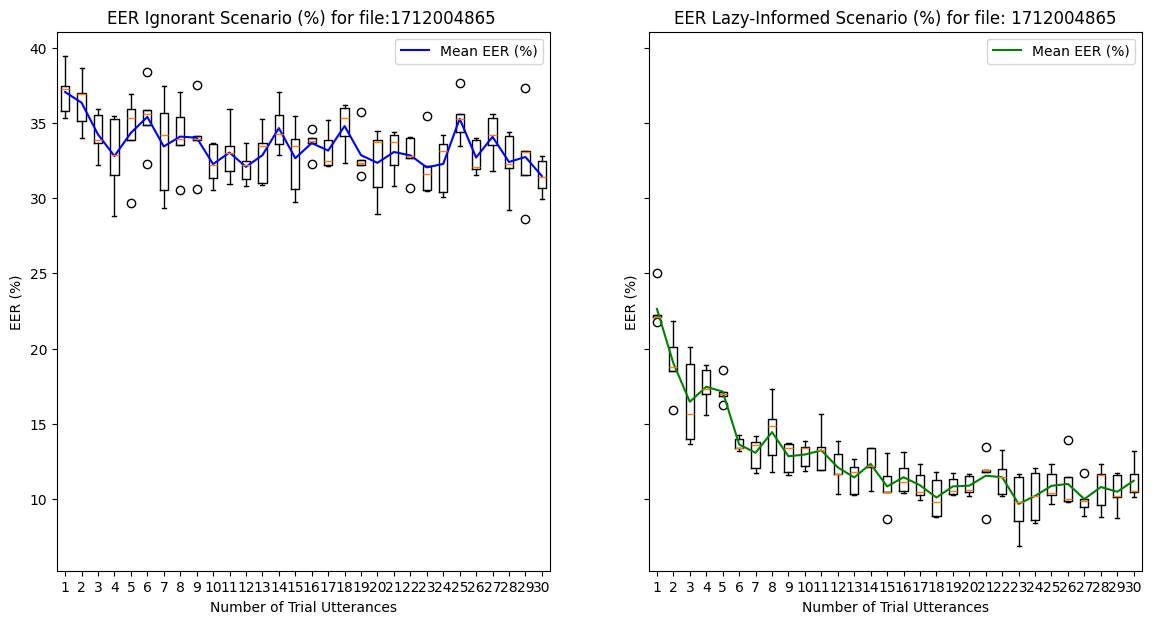

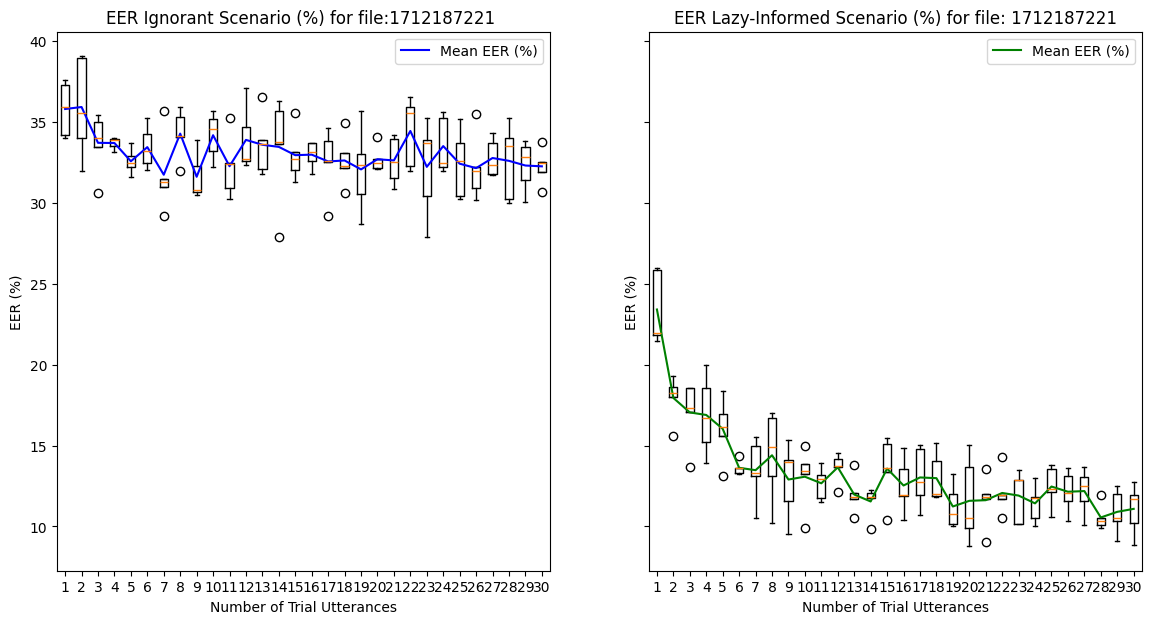

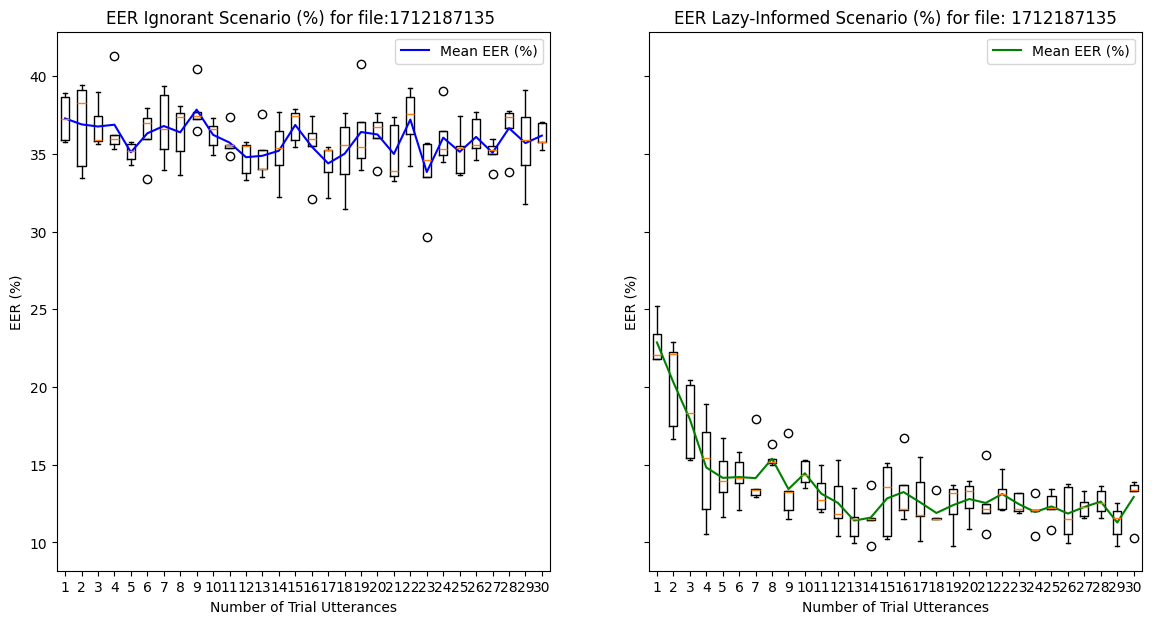

In [40]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_trials')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_trials')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of enroll
    mean_ignorant_percent =df.groupby('num_of_trials')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_trials')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Trial Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Trial Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()




##### Averaging over 5 different target selections


In [41]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [42]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overal_stats/overall_stats_stargan_lstest_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the overall statistics in a table
print("Overall statistics for ls-test-clean and other:")
display(overall_stats)

Overall statistics for ls-test-clean and other:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                35.084746  3.139296         23.591467  2.029701
2                34.415546  3.310223         18.703682  2.171832
3                33.111046  3.269172         17.264173  2.459936
4                32.726476  3.350619         16.591467  2.573512
5                32.607247  2.696395         15.949737  1.672339
6                32.916423  3.638497         14.579778  1.255624
7                32.524255  4.005907         14.583869  2.034325
8                32.984804  3.193489         14.850964  1.801343
9                33.125073  3.192037         13.891876  2.042529
10               32.073641  3.569860         14.254822  1.905664
11               32.223261  2.719770         13.366452  1.474967
12               32.213910  2.615316         13.386324  1.526842
13               32.286967  2.723309         12.248393  1.437284
14               32.343659  3.636687         12.800701  2.016894
15               32.624196  3.326639         12.925190  1.995629
16               32.023963  3.301639         12.917592  1.943774
17               32.053185  3.146515         12.796026  1.790879
18               32.556984  2.765988         12.251899  1.846322
19               31.717709  3.646649         12.295149  1.792651
20               32.263589  2.992672         12.855640  2.126425
21               31.590883  3.427158         12.564582  1.766220
22               32.625950  3.870552         12.582700  1.629583
23               31.113384  3.362854         11.766219  2.134037
24               32.711280  2.845700         12.090006  2.324956
25               32.198714  3.491656         12.219170  1.216882
26               32.012274  3.084501         12.443016  1.866819
27               32.012858  2.997802         12.088837  1.782573
28               32.177674  3.478116         12.000584  1.826211
29               31.797779  3.405840         11.967855  1.907540
30               31.633314  3.159029         11.967668  1.430702

In [43]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the resulting statistics
display(overall_stats)

eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                35.084746  3.139296         23.591467  2.029701
5                32.607247  2.696395         15.949737  1.672339
10               32.073641  3.569860         14.254822  1.905664
15               32.624196  3.326639         12.925190  1.995629
20               32.263589  2.992672         12.855640  2.126425
25               32.198714  3.491656         12.219170  1.216882
30               31.633314  3.159029         11.967668  1.430702

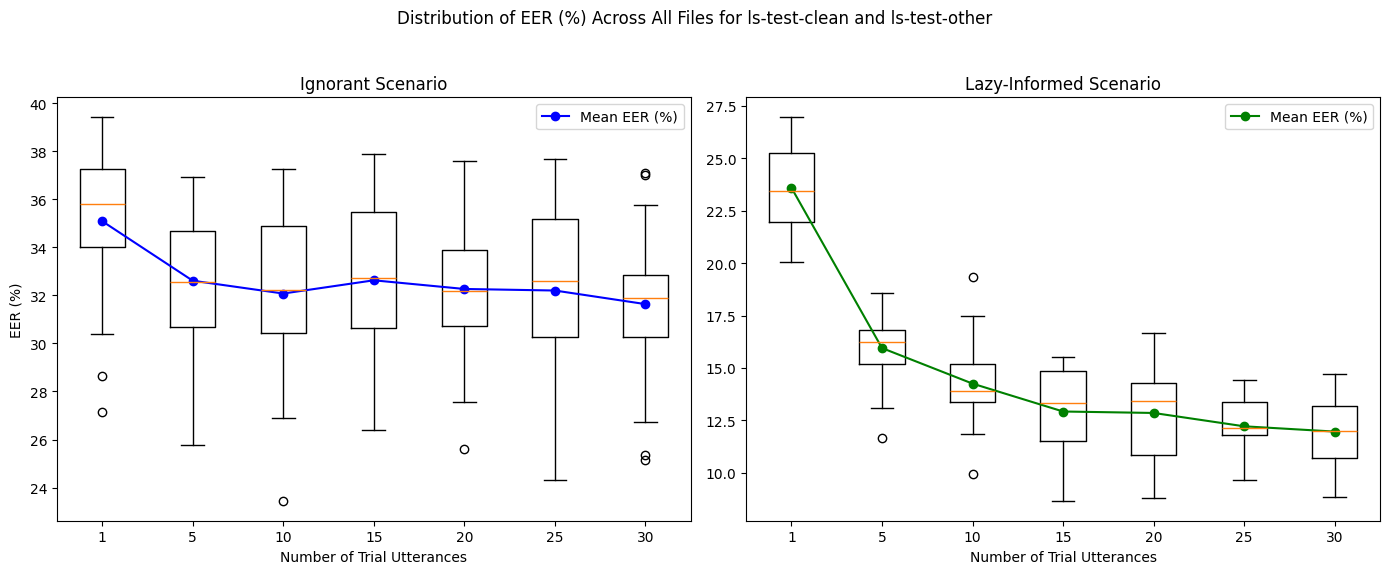

In [44]:
# Plot Box Plots and Mean Lines
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index)
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario')
axs[0].set_xlabel('Number of Trial Utterances')
axs[0].set_ylabel('EER (%)')
axs[0].legend()

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index)
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario')
axs[1].set_xlabel('Number of Trial Utterances')
axs[1].legend()

plt.suptitle('Distribution of EER (%) Across All Files for ls-test-clean and ls-test-other')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




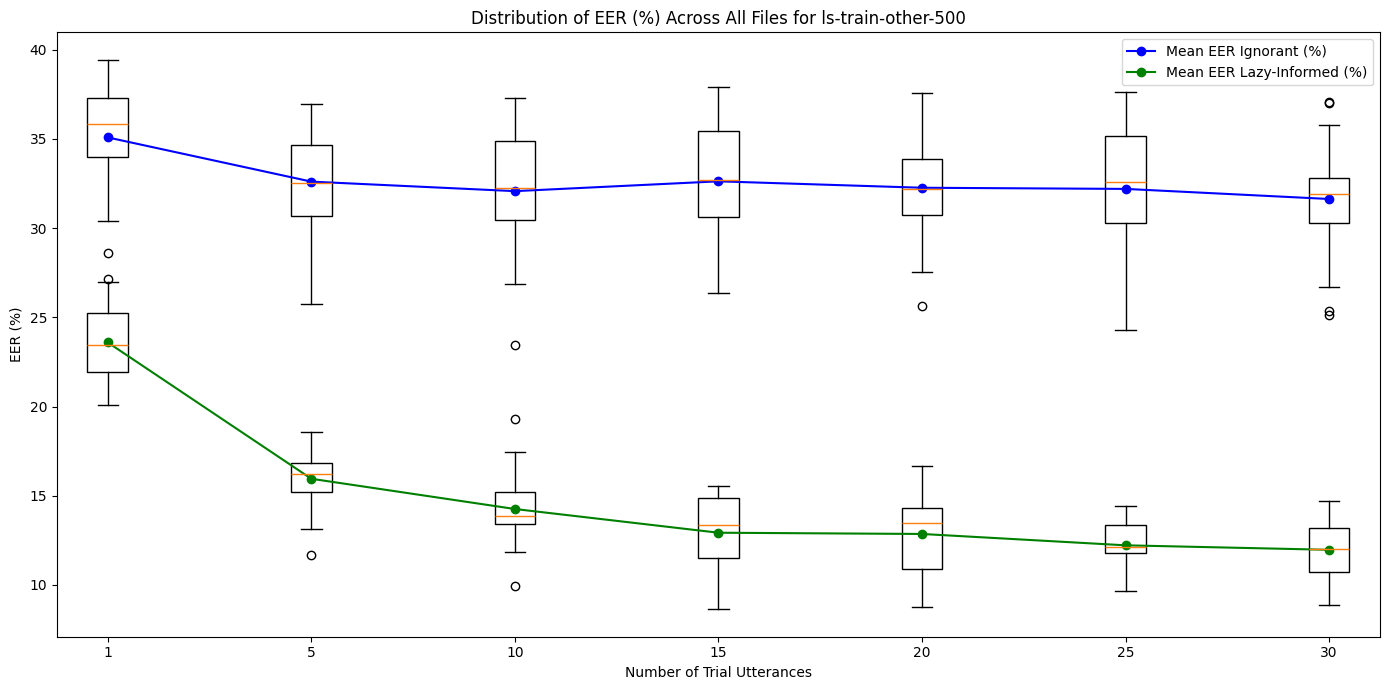

In [45]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_trials'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_trials'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_trials'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Trial Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()


### 2. Evaluation with ls-train-other-500 (795 from the 1166 speakers)
The speakers with less than 120 utterances are filtered out from the dataset

In [46]:
file_pattern = "results_stargan_trial/ls-train-other-500/stargan_to500_num_trial#*.txt" 

Individual Evaluation for different target selections

In [47]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_trials')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_trials')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1712099064


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              26.777852  0.410057     14.867607  0.785786
2              25.735751  0.436783     11.496056  0.343480
3              25.537321  0.342408     10.259401  0.525968
4              25.324375  0.429200      9.729640  0.365830
5              25.309287  0.412816      8.949752  0.333297
6              25.192077  0.257259      8.697101  0.291456
7              24.940998  0.507423      8.613863  0.324236
8              24.915301  0.343502      8.717430  0.513376
9              24.669860  0.461391      8.298208  0.175301
10             24.807065  0.151905      8.216764  0.211856
11             24.937647  0.244060      7.932555  0.243530
12             24.720000  0.292488      8.240667  0.281405
13             24.844960  0.270608      7.798654  0.190656
14             24.942555  0.357777      7.789363  0.291515
15             24.982260  0.445071      7.744337  0.142744
16             24.985627  0.492536      7.582515  0.211280
17             24.851773  0.622858      7.819269  0.235456
18             24.713679  0.370553      7.638229  0.179815
19             24.686266  0.464457      7.754819  0.281734
20             24.805651  0.261949      7.482204  0.359347
25             24.727814  0.385461      7.723500  0.285713
30             24.742044  0.183227      7.313727  0.172174
35             24.822343  0.274044      7.501946  0.205564
40             24.468825  0.318745      7.246451  0.266311
45             24.888969  0.115723      7.466846  0.186687


Statistics for file: 1712189769


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              28.121536  0.573283     15.229241  0.446180
2              27.168375  0.435250     11.393093  0.234807
3              26.751344  0.406773     10.426179  0.457230
4              26.624193  0.329552      9.540469  0.463834
5              26.713609  0.383843      9.079048  0.356298
6              26.750121  0.313076      8.814930  0.253235
7              26.525994  0.445007      8.403220  0.329114
8              26.411834  0.335053      8.378587  0.223563
9              26.663151  0.296119      8.459410  0.408823
10             26.756045  0.145594      8.308801  0.320637
11             26.251838  0.232157      8.276910  0.225526
12             26.400304  0.159090      8.113579  0.117770
13             26.485733  0.322486      7.885004  0.395459
14             26.469454  0.499994      7.925551  0.421375
15             26.305964  0.445861      7.866391  0.264407
16             26.383294  0.316062      7.895931  0.260436
17             26.380975  0.386914      7.685320  0.219243
18             26.400685  0.323703      7.907573  0.318626
19             26.106883  0.284995      7.768160  0.263605
20             26.155704  0.205409      7.710524  0.240647
25             26.341334  0.318869      7.749928  0.368612
30             26.574720  0.169430      7.556723  0.155473
35             26.499122  0.201442      7.416389  0.208475
40             26.194139  0.322951      7.684716  0.198949
45             26.447807       NaN      7.549528       NaN


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.536584  0.298154     14.426627  0.354624
2              26.457971  0.573872     10.905800  0.446263
3              26.137678  0.174056      9.714790  0.348420
4              25.771645  0.274656      8.484694  0.533223
5              26.053567  0.306276      8.208315  0.263062
6              26.115570  0.430733      8.008932  0.262146
7              26.123035  0.585042      7.865025  0.322994
8              25.891586  0.336417      7.585660  0.303164
9              25.721537  0.183684      7.358022  0.280936
10             26.035287  0.281137      7.308042  0.252782
11             25.806109  0.566059      7.210558  0.187837
12             25.777569  0.229919      7.186131  0.347013
13             25.779792  0.314732      7.161466  0.298874
14             25.733004  0.372690      7.021673  0.175638
15             25.904403  0.341748      7.234413  0.171179
16             25.812716  0.360917      6.950473  0.222491
17             25.719663  0.178960      6.742816  0.208488
18             26.007604  0.164747      6.783966  0.156097
19             25.691377  0.184747      6.886389  0.277299
20             25.872845  0.295664      6.919027  0.160974
25             25.663615  0.394448      6.902065  0.264116
30             25.774869  0.286668      6.606595  0.147347
35             25.601485  0.184324      6.785920  0.073112
40             25.483291  0.077838      6.878845  0.186575


Statistics for file: 1712189782


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.467005  0.264561     15.054730  0.419784
2              26.694328  0.324392     11.360614  0.454073
3              26.237529  0.367166     10.144431  0.490946
4              26.205240  0.396097      9.114719  0.299453
5              26.027219  0.404153      8.636352  0.374664
6              25.691536  0.239542      8.704105  0.290513
7              26.062779  0.360607      8.203678  0.419782
8              26.093129  0.196233      8.101508  0.235302
9              26.160580  0.224531      7.755582  0.418920
10             25.770438  0.408230      8.040728  0.169183
11             25.929655  0.417380      7.897758  0.105507
12             25.816893  0.425748      7.802656  0.221468
13             25.883423  0.306170      7.636403  0.063717
14             25.862855  0.422230      7.665626  0.324277
15             25.681768  0.149693      7.661433  0.323816
16             25.898511  0.279504      7.482697  0.290208
17             25.661455  0.320849      7.471293  0.140150
18             26.126640  0.275323      7.763459  0.256836
19             25.793403  0.289589      7.324686  0.312506
20             25.588334  0.294915      7.611627  0.212255
25             25.747218  0.188826      7.456729  0.144865
30             25.809682  0.247821      7.290540  0.253896
35             25.728144  0.283278      7.319111  0.187903
40             25.688344  0.133342      7.225265  0.249146
45             25.809190  0.118309      7.272307  0.249992


Statistics for file: 1712189789


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              28.729596  0.329347     15.687089  0.579058
2              27.655779  0.613013     12.122397  0.230842
3              27.638182  0.388092     10.984226  0.528826
4              27.212956  0.569125      9.952497  0.348047
5              27.158766  0.373076      9.392909  0.502742
6              27.176618  0.422400      9.524651  0.580702
7              27.180414  0.527524      9.317342  0.210373
8              27.240781  0.232321      8.942891  0.670261
9              26.829595  0.399417      8.560595  0.420159
10             26.965498  0.313803      8.717620  0.230069
11             26.863742  0.470693      8.470067  0.137422
12             26.931288  0.207949      8.711315  0.310057
13             26.965990  0.193380      8.540774  0.246677
14             27.241083  0.296604      7.996608  0.335338
15             26.907973  0.429505      8.223927  0.278552
16             26.887438  0.235162      8.301257  0.318611
17             26.837234  0.176097      8.049574  0.263486
18             26.694963  0.425095      8.266793  0.303432
19             26.795131  0.223699      8.010473  0.151059
20             26.914374  0.315291      8.193450  0.251376
25             26.655877  0.386739      8.113086  0.313116
30             26.670632  0.517792      8.028118  0.178565
35             26.694725  0.271168      7.889817  0.279397
40             26.126573  0.655448      8.001571  0.414343

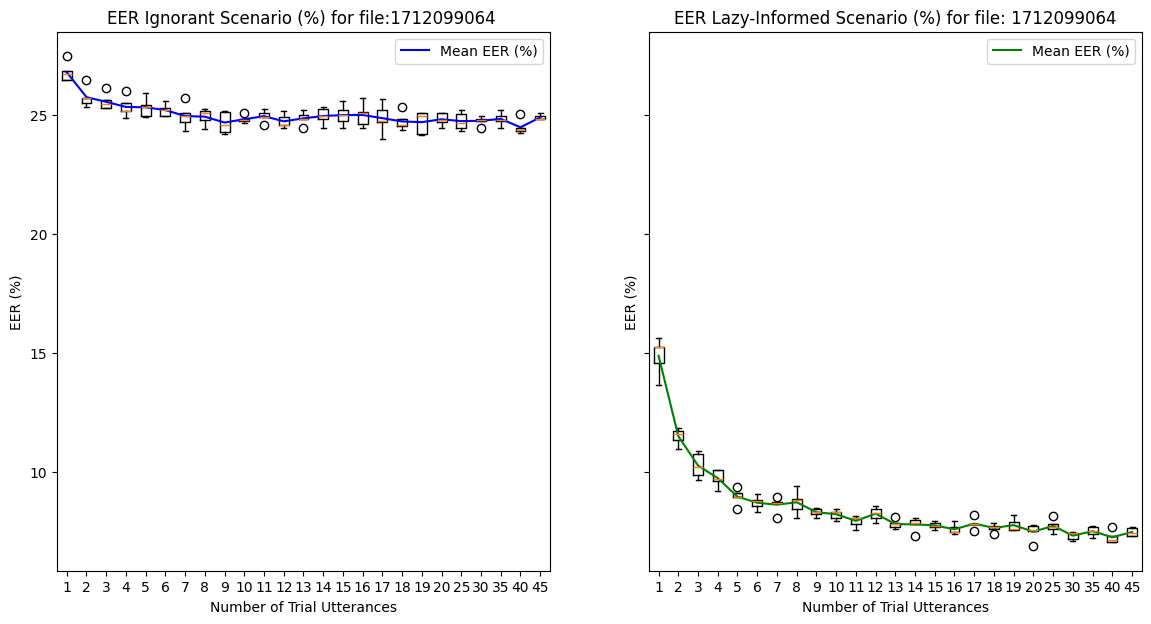

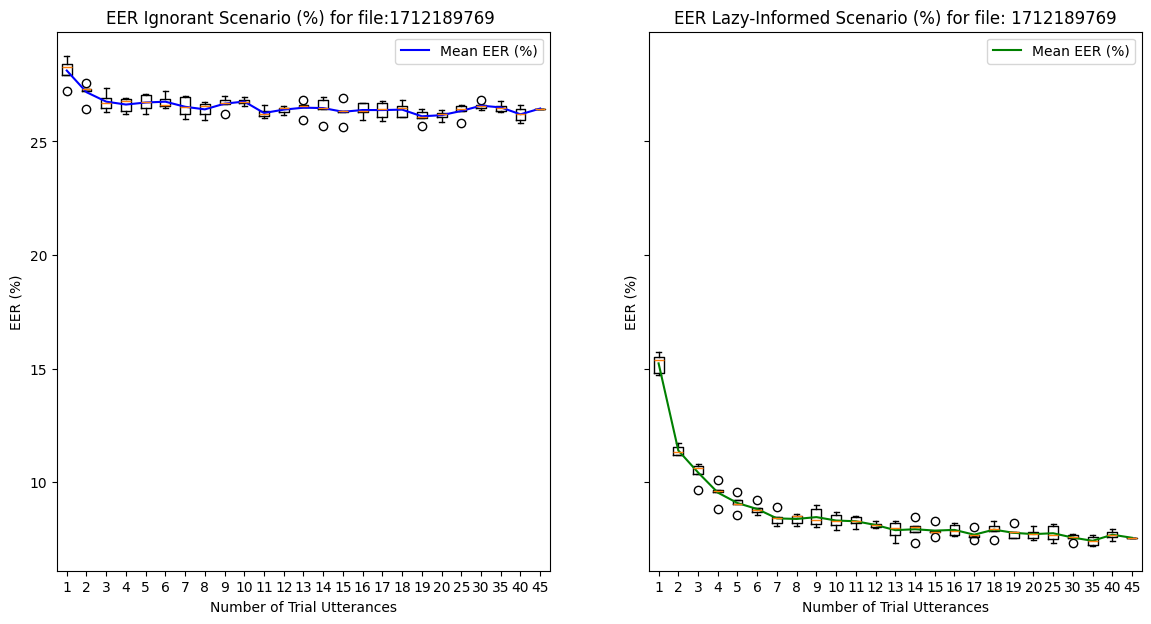

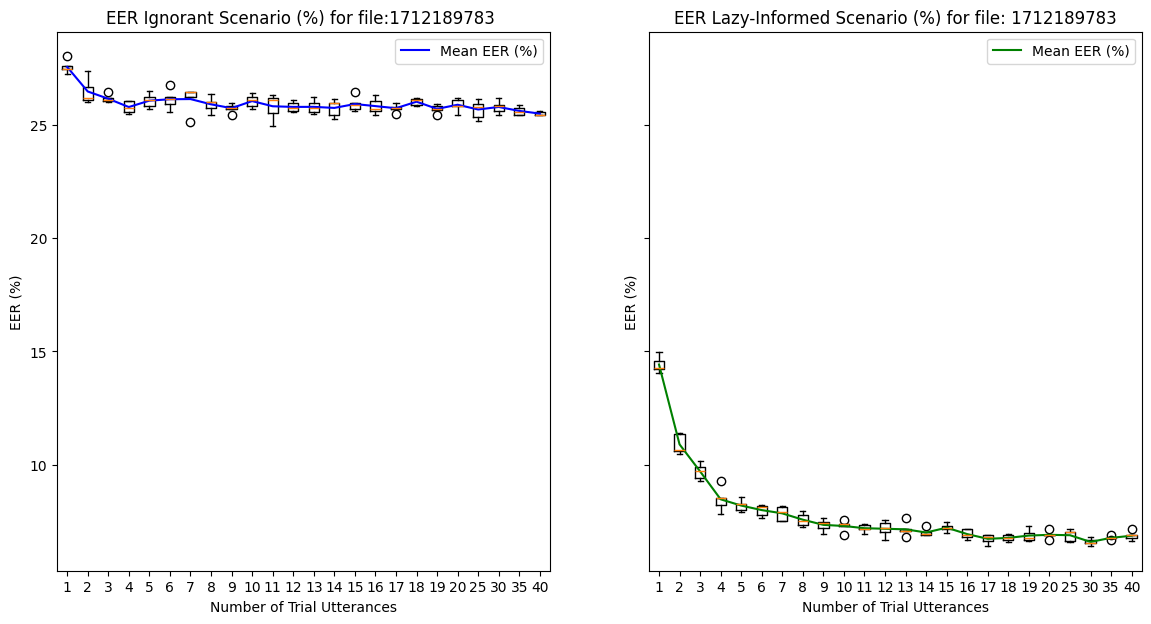

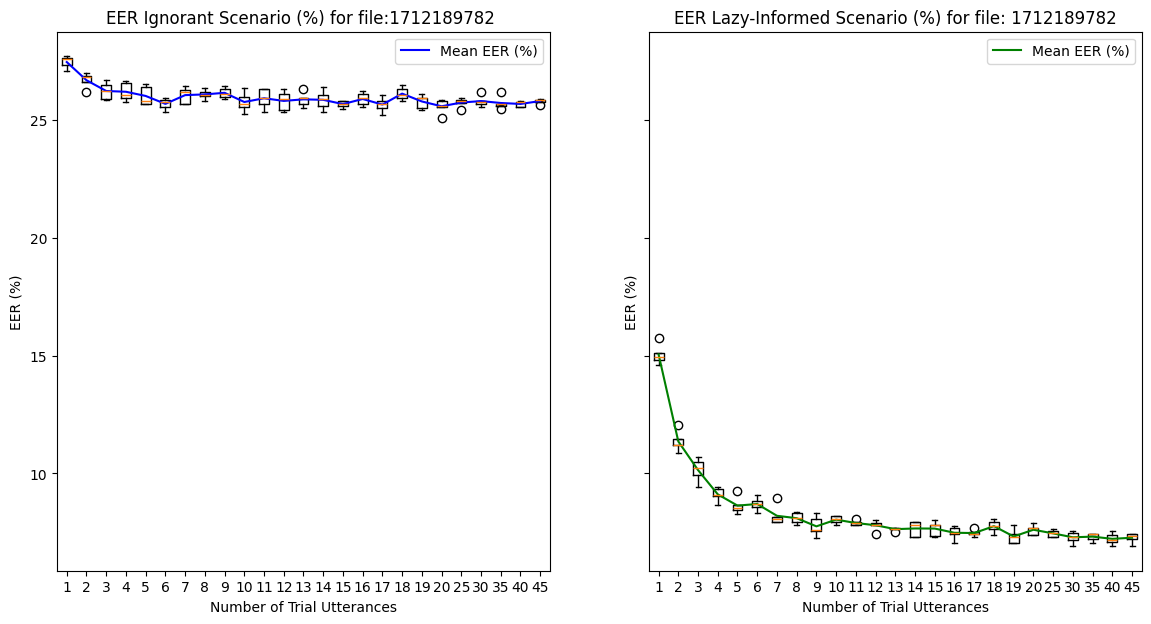

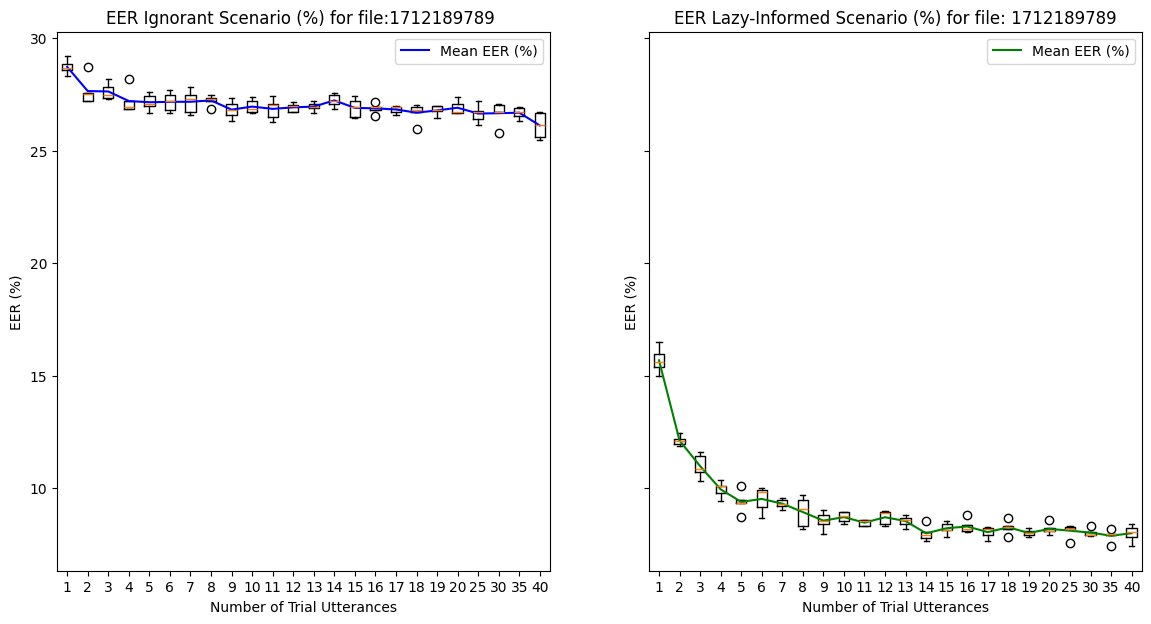

In [48]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_trials')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_trials')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of trials
    mean_ignorant_percent =df.groupby('num_of_trials')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_trials')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Trial Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Trial Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over 5 different target selections

In [49]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [50]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                27.726514  0.760608         15.053059  0.649183
2                26.742441  0.799052         11.455592  0.513738
3                26.460411  0.784811         10.305806  0.604577
4                26.227682  0.768069          9.364404  0.649001
5                26.252490  0.733880          8.853275  0.535180
6                26.185185  0.791270          8.749944  0.589829
7                26.166644  0.870421          8.480625  0.579169
8                26.110526  0.815704          8.345215  0.622702
9                26.008945  0.846020          8.086363  0.568604
10               26.066867  0.825280          8.118391  0.520861
11               25.957798  0.740976          7.957570  0.471530
12               25.929211  0.795098          8.010870  0.570901
13               25.991980  0.776059          7.804460  0.513960
14               26.049790  0.863988          7.679764  0.459822
15               25.956474  0.740384          7.746100  0.396183
16               25.993517  0.720751          7.642575  0.517282
17               25.890220  0.771954          7.553654  0.497263
18               25.988714  0.754735          7.672004  0.551587
19               25.814612  0.751058          7.548906  0.472076
20               25.867382  0.748913          7.583366  0.478214
25               25.827172  0.745221          7.589062  0.485855
30               25.914389  0.762664          7.359141  0.499408
35               25.869164  0.722916          7.382636  0.407293
40               25.569970  0.709107          7.382611  0.457724
45               25.412941  0.593230          7.397299  0.220289

In [51]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_trials'] <= 5) |  # Includes all numbers from 1 to 10
    (full_df['num_of_trials'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overal_stats/overall_stats_stargan_ls500_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                27.726514  0.760608         15.053059  0.649183
2                26.742441  0.799052         11.455592  0.513738
3                26.460411  0.784811         10.305806  0.604577
4                26.227682  0.768069          9.364404  0.649001
5                26.252490  0.733880          8.853275  0.535180
10               26.066867  0.825280          8.118391  0.520861
15               25.956474  0.740384          7.746100  0.396183
20               25.867382  0.748913          7.583366  0.478214
25               25.827172  0.745221          7.589062  0.485855
30               25.914389  0.762664          7.359141  0.499408
35               25.869164  0.722916          7.382636  0.407293
40               25.569970  0.709107          7.382611  0.457724
45               25.412941  0.593230          7.397299  0.220289

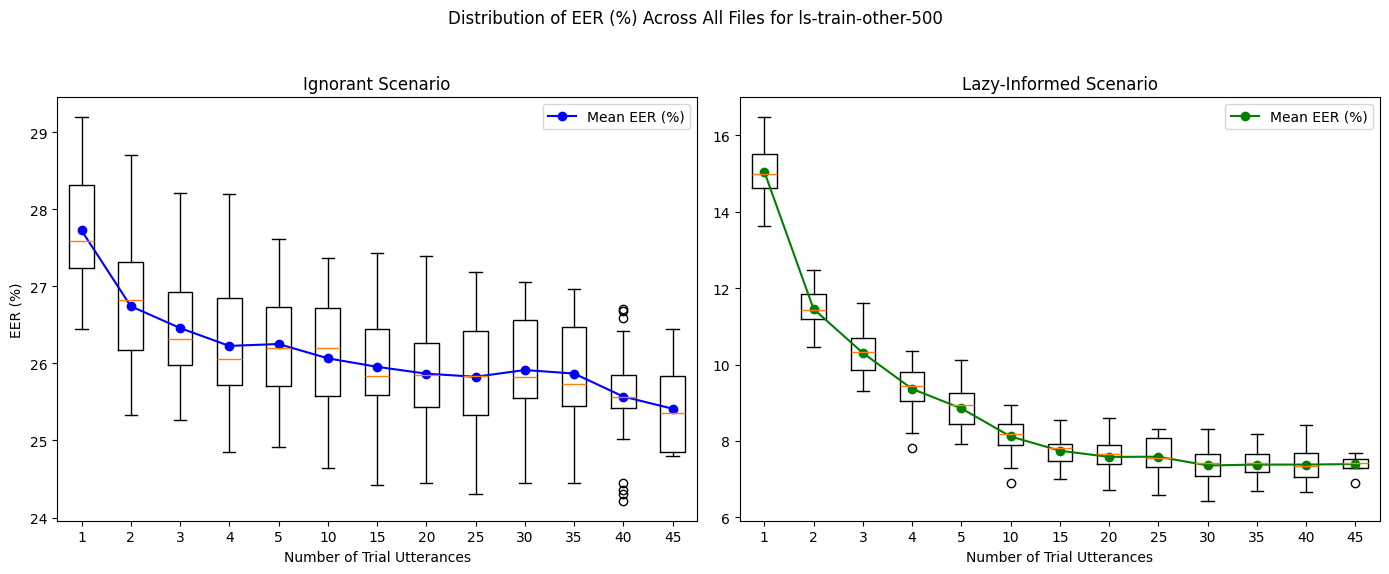

In [52]:
# Plot Box Plots and Mean Lines
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index)
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario')
axs[0].set_xlabel('Number of Trial Utterances')
axs[0].set_ylabel('EER (%)')
axs[0].legend()

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index)
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario')
axs[1].set_xlabel('Number of Trial Utterances')
axs[1].legend()

plt.suptitle('Distribution of EER (%) Across All Files for ls-train-other-500')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

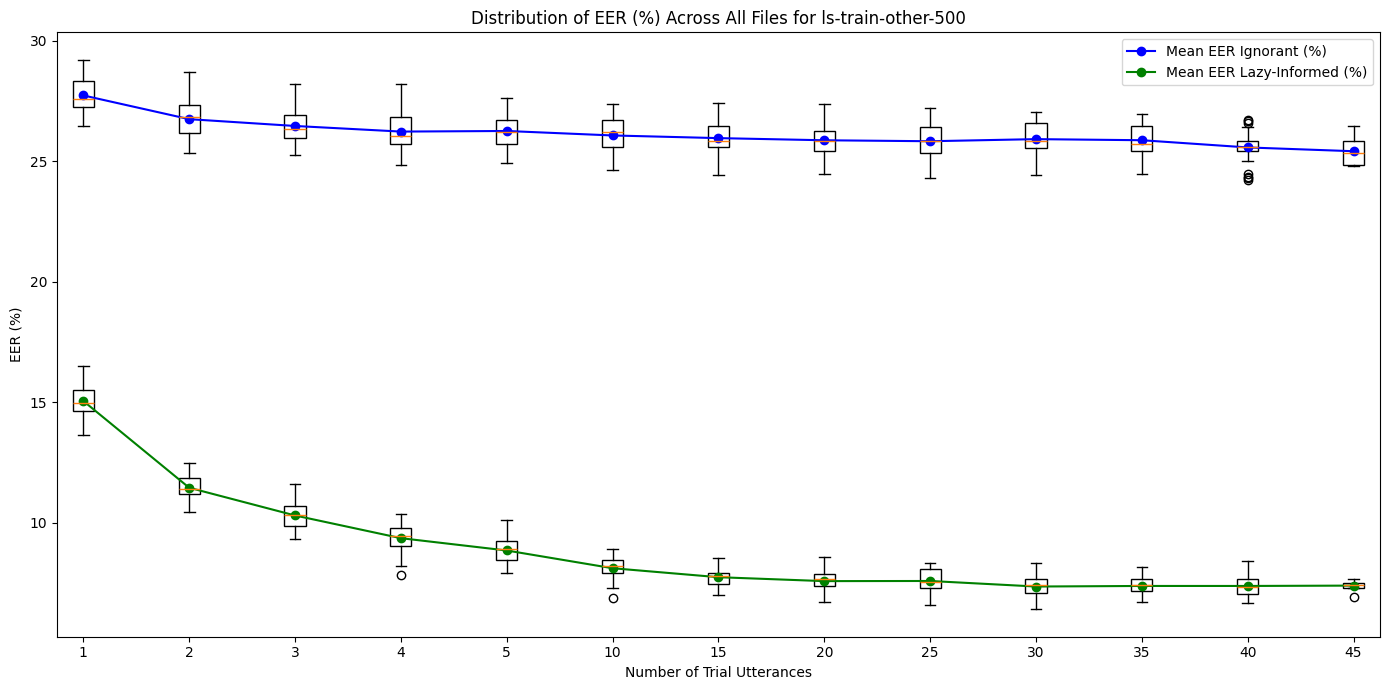

In [53]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_trials'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_trials'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_trials'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Trial Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()

# Experimentation with the kNN-VC model


### 1. Evaluation with ls-test-clean and ls-test-other (60 out of 73 speakers)
The speakers with less than 50 utterances are filtered out. We run the experiments for 5 different target selections (files).

In [54]:
file_pattern = "results_knnvc_trial/ls-test-clean_other/knnvc_tco_num_trial#*.txt" 

Individual Evaluation for different target selections

In [57]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_trials')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_trials')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1711712351


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              44.888954  1.880877     13.091759  1.875210
2              45.502630  1.269060      7.814144  1.374375
3              46.785506  1.645901      7.457627  0.855519
4              46.481590  2.030487      6.531268  0.879658
5              46.385155  1.035376      5.149036  0.851015
6              44.798364  1.443863      6.306254  1.784576
7              47.919345  0.914266      4.424313  1.538686
8              47.828755  1.698017      4.789597  1.593185
9              46.677382  0.929780      4.292811  0.830497
10             47.226768  0.687308      4.964933  0.688394
11             46.984220  1.853384      4.856809  0.661121
12             48.141438  1.800441      3.731736  1.037745
13             45.599065  1.613888      4.286967  0.879391
14             47.910579  1.487740      4.661017  1.445526
15             48.462887  1.848158      4.275278  0.741200
16             46.729982  1.419685      4.158387  1.097826
17             47.688486  1.233529      4.433080  0.711889
18             46.300409  0.797517      4.023963  1.040928
19             47.527762  1.036551      3.994740  0.446137
20             46.548802  1.035726      4.053185  0.886103
21             47.726476  1.502824      4.418469  1.820757
22             47.139100  2.774931      4.579193  1.220882
23             46.735827  1.378841      3.772648  0.923374
24             45.943892  0.672487      4.097019  1.013705
25             47.156634  3.014624      4.117475  1.071291
26             46.101695  1.425351      4.523670  1.470622
27             47.104033  1.182318      4.284044  1.044808
28             47.264757  1.926437      3.807715  1.718700
29             47.305669  1.267217      3.991818  0.785310
30             46.618936  2.308282      3.638223  0.642234


Statistics for file: 1712524706


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              44.044418  2.909502     12.261835  2.260049
2              41.554646  1.816719      7.726476  0.942596
3              42.682642  1.554594      5.926359  0.629357
4              40.488019  1.411904      6.876096  1.042414
5              42.454705  1.242591      4.576271  1.220261
6              41.402688  0.950052      6.969608  1.736415
7              41.665693  0.703441      5.517241  2.313155
8              41.329632  1.928796      4.848042  1.034437
9              41.315020  1.386792      6.364699  1.956190
10             41.078317  1.695218      4.400935  1.439918
11             40.306838  1.552815      4.865576  1.868453
12             40.350672  1.426706      5.315605  1.717575
13             40.727645  1.897804      5.081823  0.570161
14             40.940970  1.819654      4.570427  1.547437
15             41.890707  0.657591      4.292811  0.961988
16             41.072472  3.459958      4.275278  1.106253
17             41.805961  2.115074      4.146698  1.211129
18             41.350088  2.346451      4.786674  1.264603
19             40.967271  1.432709      4.491525  1.291497
20             41.873174  0.700080      5.336061  1.741215
21             41.580947  2.088384      4.412624  1.054297
22             40.353594  0.667852      5.187025  1.878736
23             41.104617  1.368966      3.766803  1.216976
24             42.378726  1.601979      4.777908  1.314696
25             41.589714  1.060435      4.441847  0.977650
26             42.130333  1.952831      4.678551  1.232490
27             41.899474  2.480457      4.029807  1.051631
28             41.601403  0.832038      3.535944  0.836746
29             42.028054  2.017360      3.562244  0.658435
30             41.835184  1.840083      3.997662  1.213955


Statistics for file: 1712514147


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              48.559322  1.659645     13.684980  2.351009
2              49.736996  1.986148      9.009351  2.122736
3              49.418469  2.116386      7.492694  2.637446
4              50.137347  2.568992      5.742256  1.550214
5              51.390999  1.996023      5.125658  1.385129
6              50.119813  0.630442      5.642899  2.052916
7              50.619521  1.521917      5.134424  1.842582
8              51.677382  2.637243      5.385739  0.965433
9              50.704267  2.142004      5.496786  0.820996
10             51.320865  0.832692      6.671537  1.698960
11             49.970777  1.065526      5.619521  0.970670
12             51.613092  1.265489      5.204559  1.170614
13             50.011689  1.504060      4.921099  1.116712
14             49.956166  1.175055      4.818819  1.261213
15             50.324372  1.538339      5.353594  1.280790
16             50.759790  1.238693      5.210403  1.881422
17             51.674459  1.641992      3.883694  0.581652
18             50.683811  2.343888      5.753945  1.311786
19             49.631794  1.545987      5.464641  2.443307
20             49.114553  1.572658      4.278200  1.158791
21             50.052601  1.405562      4.193454  1.369301
22             50.952659  1.550366      5.479252  1.509041
23             49.146698  1.195302      4.713618  1.344307
24             50.622443  1.441777      5.473407  1.026419
25             50.271771  1.245166      4.289889  0.974293
26             50.651666  1.473957      3.939217  1.059579
27             49.652250  1.748953      5.058445  1.518153
28             50.619521  1.432716      4.666861  1.419392
29             50.526008  1.305243      3.813559  0.735518
30             50.765634  2.308536      4.251899  1.399946


Statistics for file: 1712444243


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              43.077148  2.232845     13.907072  2.883887
2              43.766803  1.870069      9.327878  0.924830
3              41.393922  1.531440      6.642314  1.045482
4              41.317943  2.591843      5.467563  1.518891
5              40.973115  0.949816      5.435418  1.274080
6              42.033898  2.337549      5.625365  1.051255
7              42.504383  1.090627      4.810053  1.587177
8              39.745763  1.654291      6.125073  1.490514
9              40.327294  0.501490      4.099942  0.672328
10             42.302747  0.262069      5.850380  1.108470
11             40.105202  1.005075      3.258328  0.997859
12             43.313852  2.560126      4.380479  1.039019
13             41.633548  1.308780      4.801286  1.216766
14             42.180012  2.412495      4.181765  0.889637
15             41.618936  2.419547      4.798364  2.151159
16             40.756867  1.776663      3.977206  0.889157
17             41.595558  0.750915      4.234366  0.654940
18             41.542957  2.533528      4.240210  1.072785
19             41.797195  1.683940      4.497370  1.286063
20             42.577440  1.630687      4.219755  1.062185
21             40.610754  1.886861      4.295733  1.482925
22             41.881940  1.717053      4.646406  2.101545
23             41.072472  1.170413      4.023963  0.827226
24             41.455289  1.667339      5.680888  1.122290
25             42.358270  2.915227      4.050263  1.013431
26             40.593220  1.710288      4.614261  1.635374
27             39.812975  1.492625      4.684395  1.036973
28             43.512566  1.533007      4.345412  0.858073
29             41.291642  1.824517      5.219170  1.341437
30             42.212157  1.582314      3.942139  0.617007


Statistics for file: 1712506146


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              45.192870  1.231520     13.877849  2.166335
2              42.855056  2.711831      8.188194  1.236995
3              40.321449  1.476996      8.930450  2.012587
4              44.006429  1.812583      7.448860  2.382643
5              41.674459  1.642116      5.555231  0.947678
6              43.018703  2.430986      5.634132  1.700373
7              41.960842  1.415582      5.993571  1.815349
8              41.817650  1.160567      4.418469  0.629866
9              42.139100  2.044100      4.906487  0.924587
10             42.539451  1.983932      4.216832  0.927078
11             43.600234  2.600120      6.133840  1.565201
12             43.500877  1.042302      5.075979  1.222760
13             40.993571  2.004540      4.316189  0.919969
14             43.012858  0.604334      5.122735  0.469454
15             41.852718  1.416682      4.354179  1.200088
16             42.285213  1.754121      4.360023  1.060032
17             43.369375  2.474787      4.246055  0.932016
18             41.867329  1.765936      3.962595  0.768687
19             42.925190  2.055619      4.848042  1.323815
20             42.819988  1.577064      4.552893  0.986379
21             42.033898  1.663365      4.798364  0.689494
22             42.147867  1.404689      4.696084  0.736577
23             42.483928  2.262107      3.947984  0.942426
24             41.484512  1.674494      4.801286  0.617543
25             42.752776  1.340068      3.746347  0.538304
26             40.829924  0.916773      4.251899  0.994859
27             41.691993  1.045380      5.102279  1.624601
28             42.405026  1.064193      3.419053  0.301575
29             42.562829  1.389307      4.281122  1.636829
30             42.305669  1.491595      4.035652  0.697330

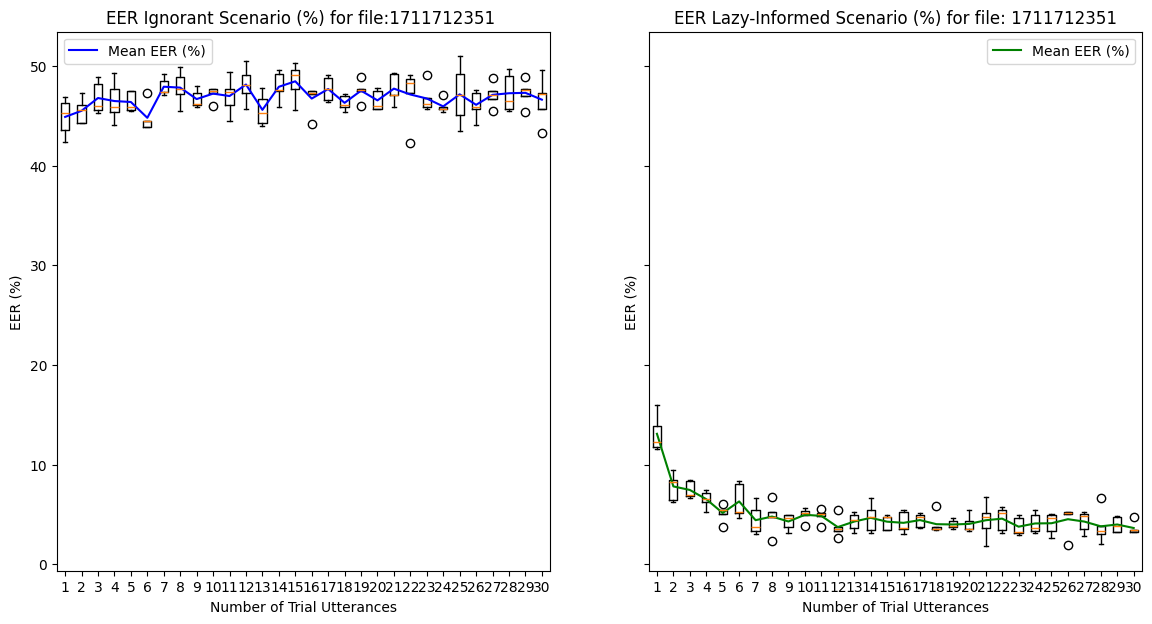

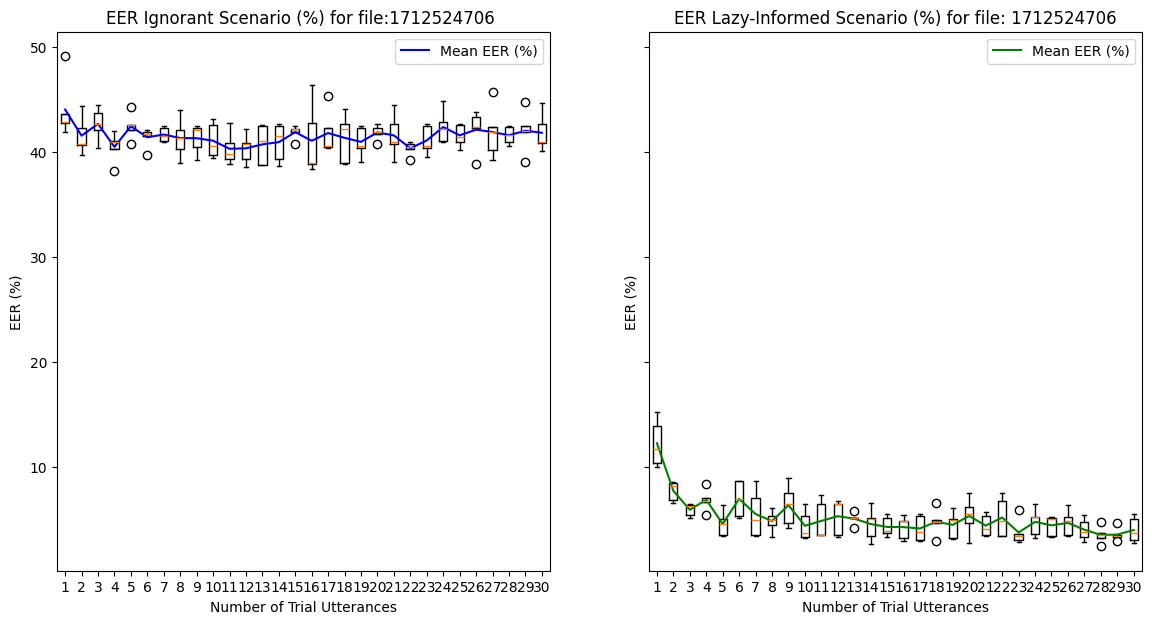

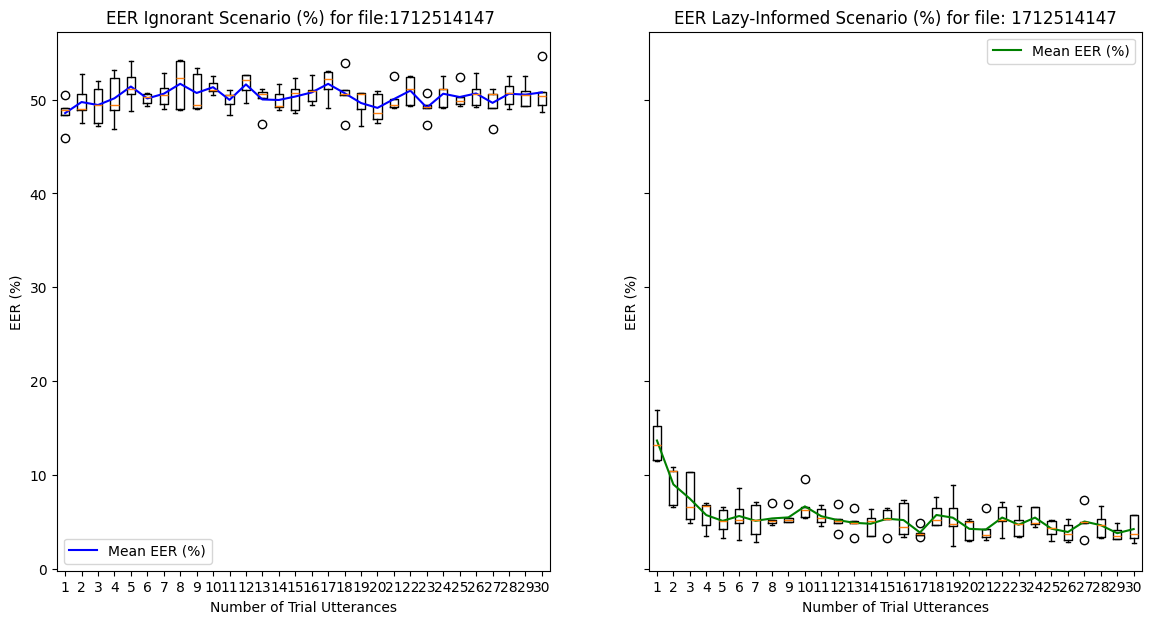

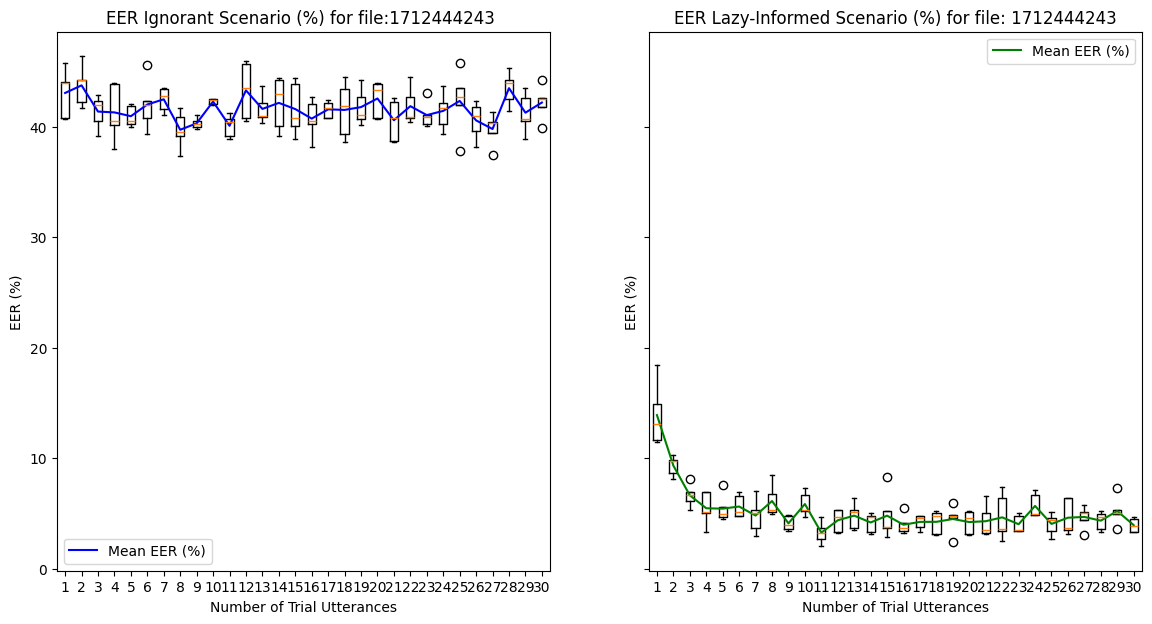

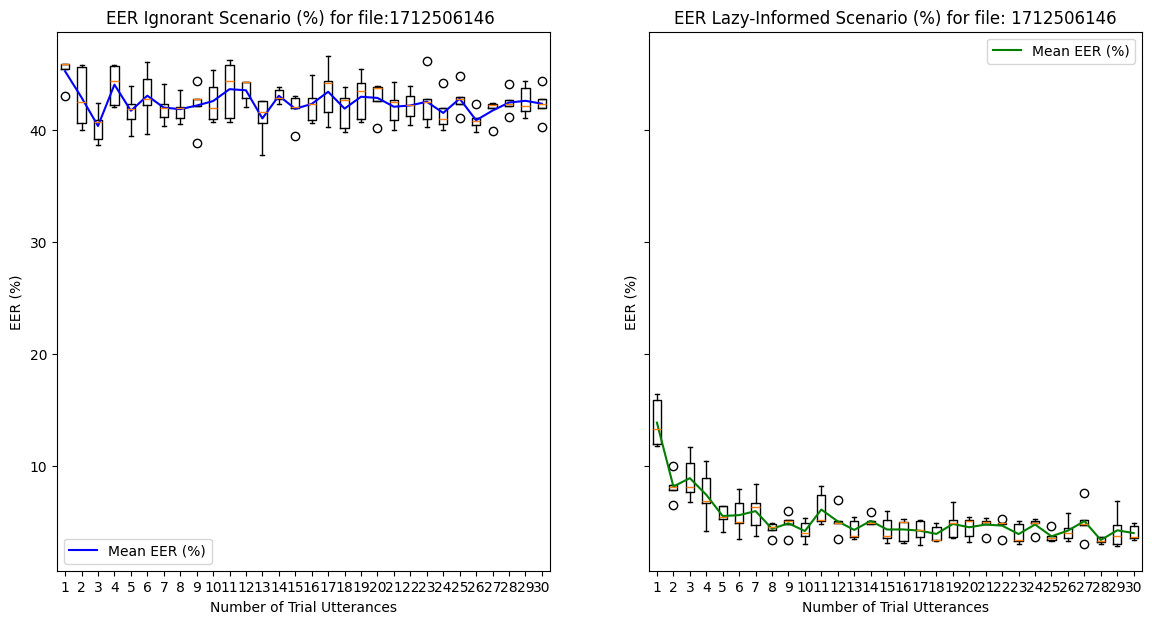

In [58]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_trials')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_trials')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of trials
    mean_ignorant_percent =df.groupby('num_of_trials')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_trials')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for file:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Trial Utterances')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for file: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Trial Utterances')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over 5 different target selections

In [59]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [61]:
# Aggregate and calculate overall mean and standard deviation for each number of enrolls
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overal_stats/overall_stats_knnvc_lstest_num_trials.csv', index=True)

# Display the overall statistics in a table
print("Overall Statistics for ls-test-clean and other:")
display(overall_stats)

Overall Statistics for ls-test-clean and other:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                45.152542  2.670054         13.364699  2.221107
2                44.683226  3.414052          8.413209  1.429468
3                44.120397  3.829994          7.289889  1.804012
4                44.486265  4.091298          6.413209  1.610078
5                44.575687  4.177717          5.168323  1.108333
6                44.274693  3.567610          6.035652  1.643034
7                44.933957  3.876591          5.175921  1.769412
8                44.479836  4.927730          5.113384  1.248568
9                44.232613  4.219262          5.032145  1.340154
10               44.893629  4.082475          5.220923  1.462313
11               44.193454  4.211573          4.946815  1.539753
12               45.383986  4.358575          4.741672  1.305714
13               43.793103  3.957853          4.681473  0.941959
14               44.800117  3.864490          4.670953  1.131441
15               44.829924  4.144806          4.614845  1.308046
16               44.320865  4.379529          4.396259  1.226224
17               45.226768  4.288406          4.188778  0.796806
18               44.348919  4.180865          4.553477  1.219579
19               44.569842  3.758500          4.659264  1.455933
20               44.586791  3.103050          4.488019  1.193493
21               44.400935  4.154796          4.423729  1.240869
22               44.495032  4.343531          4.917592  1.474105
23               44.108708  3.608991          4.045003  1.038739
24               44.376973  3.843330          4.966102  1.113041
25               44.825833  3.915662          4.129164  0.886488
26               44.061368  4.163851          4.401520  1.220311
27               44.032145  4.082283          4.631794  1.246917
28               45.080655  3.683392          3.954997  1.149320
29               44.742840  3.930570          4.173583  1.163429
30               44.747516  3.968886          3.973115  0.908951

In [62]:
full_df = full_df[(full_df['num_of_trials'] % 5 == 0) | (full_df['num_of_trials'] == 1)]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = filtered_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})

# Display the resulting statistics
display(overall_stats)

eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                35.084746  3.139296         23.591467  2.029701
5                32.607247  2.696395         15.949737  1.672339
10               32.073641  3.569860         14.254822  1.905664
15               32.624196  3.326639         12.925190  1.995629
20               32.263589  2.992672         12.855640  2.126425
25               32.198714  3.491656         12.219170  1.216882
30               31.633314  3.159029         11.967668  1.430702

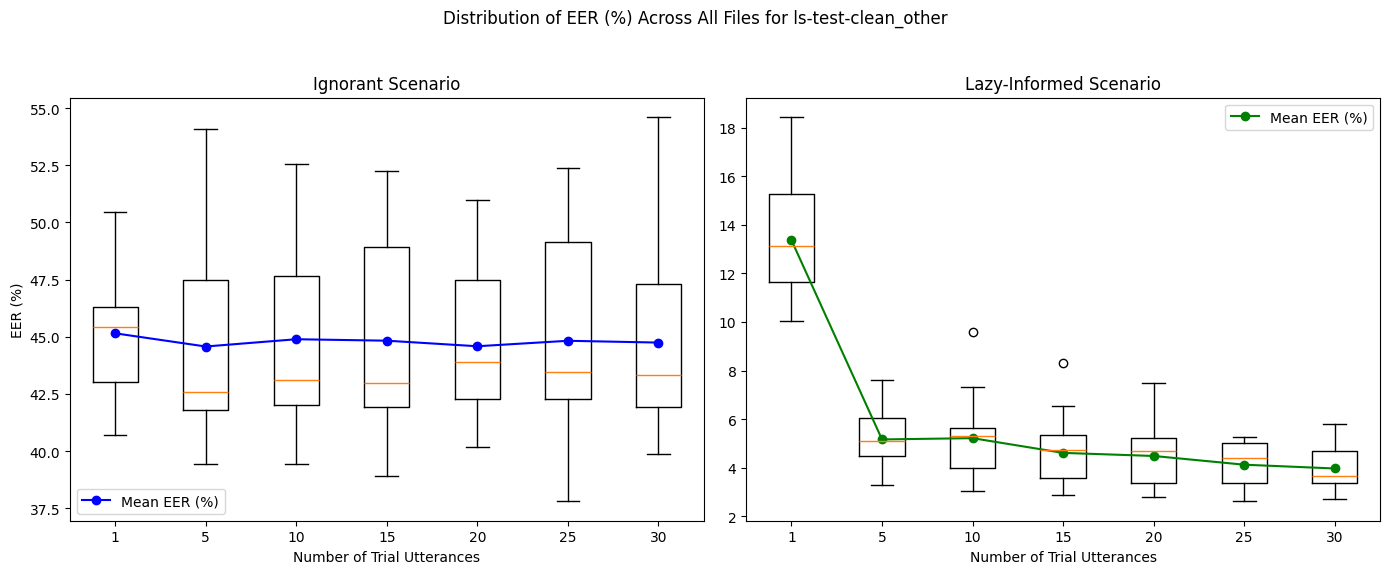

In [63]:
# Plot Box Plots and Mean Lines
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index)
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario')
axs[0].set_xlabel('Number of Trial Utterances')
axs[0].set_ylabel('EER (%)')
axs[0].legend()

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index)
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario')
axs[1].set_xlabel('Number of Trial Utterances')
axs[1].legend()

plt.suptitle('Distribution of EER (%) Across All Files for ls-test-clean_other')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

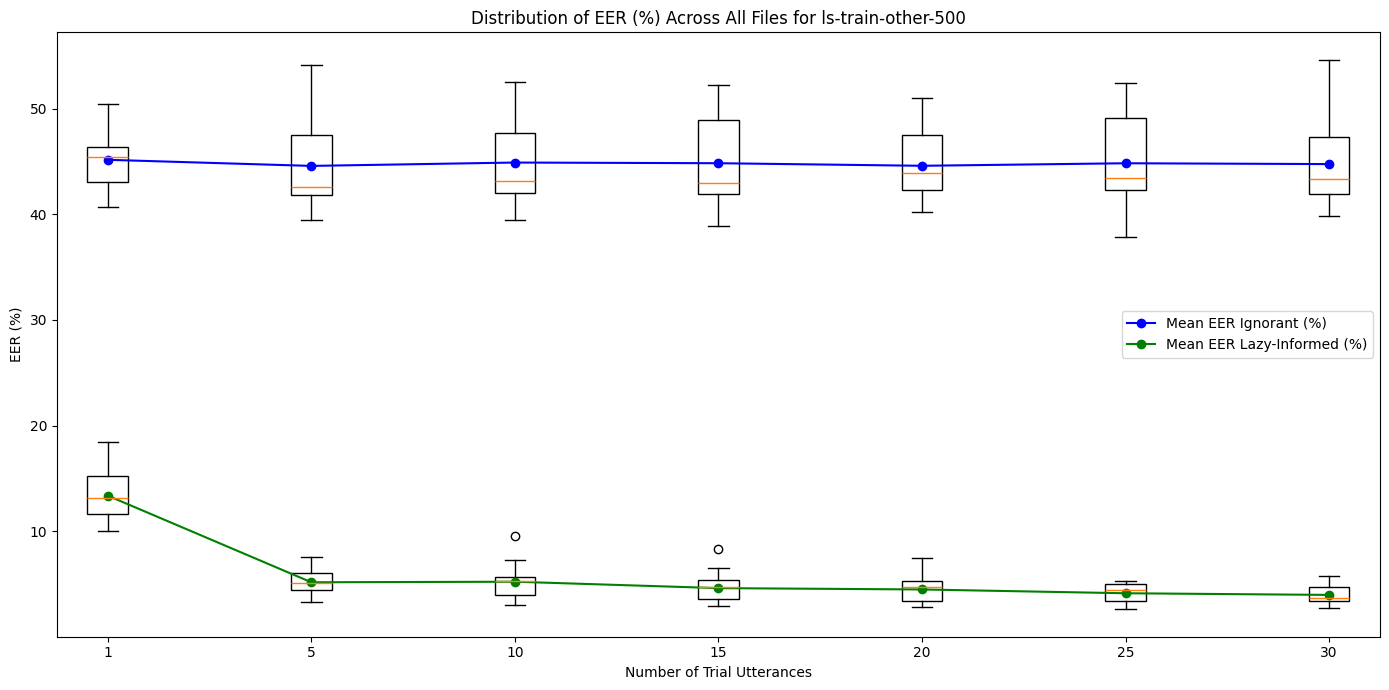

In [64]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_trials'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_trials'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_trials'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Trial Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()

### 2. Evaluation with ls-train-other-500 (795 from the 1166 enroll)
The speakers with less than 120 utterances are filtered out from the dataset

In [65]:
file_pattern = "results_knnvc_trial/ls-train-other-500/knnv_to500_num_trial#*.txt" 

Individual Evaluation for different target selections

In [66]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_trials')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_trials')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for file: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.536584  0.298154     14.867607  0.785786
2              26.457971  0.573872     11.496056  0.343480
3              26.137678  0.174056     10.259401  0.525968
4              25.771645  0.274656      9.729640  0.365830
5              26.053567  0.306276      8.949752  0.333297
6              26.115570  0.430733      8.697101  0.291456
7              26.123035  0.585042      8.613863  0.324236
8              25.891586  0.336417      8.717430  0.513376
9              25.721537  0.183684      8.298208  0.175301
10             26.035287  0.281137      8.216764  0.211856
11             25.806109  0.566059      7.932555  0.243530
12             25.777569  0.229919      8.240667  0.281405
13             25.779792  0.314732      7.798654  0.190656
14             25.733004  0.372690      7.789363  0.291515
15             25.904403  0.341748      7.744337  0.142744
16             25.812716  0.360917      7.582515  0.211280
17             25.719663  0.178960      7.819269  0.235456
18             26.007604  0.164747      7.638229  0.179815
19             25.691377  0.184747      7.754819  0.281734
20             25.872845  0.295664      7.482204  0.359347
25             25.663615  0.394448      7.723500  0.285713
30             25.774869  0.286668      7.313727  0.172174
35             25.601485  0.184324      7.501946  0.205564
40             25.483291  0.077838      7.246451  0.266311


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.536584  0.298154     15.054730  0.419784
2              26.457971  0.573872     11.360614  0.454073
3              26.137678  0.174056     10.144431  0.490946
4              25.771645  0.274656      9.114719  0.299453
5              26.053567  0.306276      8.636352  0.374664
6              26.115570  0.430733      8.704105  0.290513
7              26.123035  0.585042      8.203678  0.419782
8              25.891586  0.336417      8.101508  0.235302
9              25.721537  0.183684      7.755582  0.418920
10             26.035287  0.281137      8.040728  0.169183
11             25.806109  0.566059      7.897758  0.105507
12             25.777569  0.229919      7.802656  0.221468
13             25.779792  0.314732      7.636403  0.063717
14             25.733004  0.372690      7.665626  0.324277
15             25.904403  0.341748      7.661433  0.323816
16             25.812716  0.360917      7.482697  0.290208
17             25.719663  0.178960      7.471293  0.140150
18             26.007604  0.164747      7.763459  0.256836
19             25.691377  0.184747      7.324686  0.312506
20             25.872845  0.295664      7.611627  0.212255
25             25.663615  0.394448      7.456729  0.144865
30             25.774869  0.286668      7.290540  0.253896
35             25.601485  0.184324      7.319111  0.187903
40             25.483291  0.077838      7.225265  0.249146


Statistics for file: 1712189789


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              28.729596  0.329347     15.687089  0.579058
2              27.655779  0.613013     12.122397  0.230842
3              27.638182  0.388092     10.984226  0.528826
4              27.212956  0.569125      9.952497  0.348047
5              27.158766  0.373076      9.392909  0.502742
6              27.176618  0.422400      9.524651  0.580702
7              27.180414  0.527524      9.317342  0.210373
8              27.240781  0.232321      8.942891  0.670261
9              26.829595  0.399417      8.560595  0.420159
10             26.965498  0.313803      8.717620  0.230069
11             26.863742  0.470693      8.470067  0.137422
12             26.931288  0.207949      8.711315  0.310057
13             26.965990  0.193380      8.540774  0.246677
14             27.241083  0.296604      7.996608  0.335338
15             26.907973  0.429505      8.223927  0.278552
16             26.887438  0.235162      8.301257  0.318611
17             26.837234  0.176097      8.049574  0.263486
18             26.694963  0.425095      8.266793  0.303432
19             26.795131  0.223699      8.010473  0.151059
20             26.914374  0.315291      8.193450  0.251376
25             26.655877  0.386739      8.113086  0.313116
30             26.670632  0.517792      8.028118  0.178565
35             26.694725  0.271168      7.889817  0.279397
40             26.227285  0.610675      7.957442  0.372151


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.536584  0.298154     15.229241  0.446180
2              26.457971  0.573872     11.393093  0.234807
3              26.137678  0.174056     10.426179  0.457230
4              25.771645  0.274656      9.540469  0.463834
5              26.053567  0.306276      9.079048  0.356298
6              26.115570  0.430733      8.814930  0.253235
7              26.123035  0.585042      8.403220  0.329114
8              25.891586  0.336417      8.378587  0.223563
9              25.721537  0.183684      8.459410  0.408823
10             26.035287  0.281137      8.308801  0.320637
11             25.806109  0.566059      8.276910  0.225526
12             25.777569  0.229919      8.113579  0.117770
13             25.779792  0.314732      7.885004  0.395459
14             25.733004  0.372690      7.925551  0.421375
15             25.904403  0.341748      7.866391  0.264407
16             25.812716  0.360917      7.895931  0.260436
17             25.719663  0.178960      7.685320  0.219243
18             26.007604  0.164747      7.907573  0.318626
19             25.691377  0.184747      7.768160  0.263605
20             25.872845  0.295664      7.710524  0.240647
25             25.663615  0.394448      7.749928  0.368612
30             25.774869  0.286668      7.556723  0.155473
35             25.601485  0.184324      7.416389  0.208475
40             25.483291  0.077838      7.684716  0.198949


Statistics for file: 1712189783


Ignorant           Lazy-Informed          
                    mean       std          mean       std
num_of_trials                                             
1              27.536584  0.298154     14.426627  0.354624
2              26.457971  0.573872     10.905800  0.446263
3              26.137678  0.174056      9.714790  0.348420
4              25.771645  0.274656      8.484694  0.533223
5              26.053567  0.306276      8.208315  0.263062
6              26.115570  0.430733      8.008932  0.262146
7              26.123035  0.585042      7.865025  0.322994
8              25.891586  0.336417      7.585660  0.303164
9              25.721537  0.183684      7.358022  0.280936
10             26.035287  0.281137      7.308042  0.252782
11             25.806109  0.566059      7.210558  0.187837
12             25.777569  0.229919      7.186131  0.347013
13             25.779792  0.314732      7.161466  0.298874
14             25.733004  0.372690      7.021673  0.175638
15             25.904403  0.341748      7.234413  0.171179
16             25.812716  0.360917      6.950473  0.222491
17             25.719663  0.178960      6.742816  0.208488
18             26.007604  0.164747      6.783966  0.156097
19             25.691377  0.184747      6.886389  0.277299
20             25.872845  0.295664      6.919027  0.160974
25             25.663615  0.394448      6.902065  0.264116
30             25.774869  0.286668      6.606595  0.147347
35             25.601485  0.184324      6.785920  0.073112
40             25.483291  0.077838      6.878845  0.186575

Aggregate over all the EErs

In [67]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)

In [68]:
# Aggregate and calculate overall mean and standard deviation for each number of enroll
overall_stats = full_df.groupby('num_of_trials').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                27.775187  0.560852         15.053059  0.649183
2                26.697533  0.722016         11.455592  0.513738
3                26.437779  0.648499         10.305806  0.604577
4                26.059907  0.671196          9.364404  0.649001
5                26.274607  0.537877          8.853275  0.535180
6                26.327780  0.584005          8.749944  0.589829
7                26.334511  0.678900          8.480625  0.579169
8                26.161425  0.622763          8.345215  0.622702
9                25.943149  0.503701          8.086363  0.568604
10               26.221329  0.461865          8.118391  0.520861
11               26.017635  0.661038          7.957570  0.471530
12               26.008313  0.514095          8.010870  0.570901
13               26.017032  0.553878          7.804460  0.513960
14               26.034620  0.697360          7.679764  0.459822
15               26.105117  0.525800          7.746100  0.396183
16               26.027660  0.537180          7.642575  0.517282
17               25.943177  0.484438          7.553654  0.497263
18               26.145076  0.356308          7.672004  0.551587
19               25.912128  0.483880          7.548906  0.472076
20               26.081151  0.505612          7.583366  0.478214
25               25.862068  0.541065          7.589062  0.485855
30               25.954021  0.482910          7.359141  0.499408
35               25.820133  0.483840          7.382636  0.407293
40               25.632089  0.398055          7.398544  0.455113

In [71]:
# Incrementing by 1 till 10, and by 5 thereafter
condition = (
    (full_df['num_of_trials'] <= 10) |  # Includes all numbers from 1 to 10
    (full_df['num_of_trials'] % 5 == 0)  # Includes multiples of 5
)

# Apply the condition to filter the DataFrame
full_df = full_df[condition]

# Aggregate and calculate mean and standard deviation for each group of 'num'
overall_stats = full_df.groupby('num_of_trials').agg({
    'eer_ignorant': ['mean', 'std'],
    'eer_lazy-informed': ['mean', 'std']
})
overall_stats.to_csv('overal_stats/overall_stats_knnvc_ls500_num_trials.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the resulting statistics
display(overall_stats)


eer_ignorant           eer_lazy-informed          
                      mean       std              mean       std
num_of_trials                                                   
1                27.775187  0.560852         15.053059  0.649183
2                26.697533  0.722016         11.455592  0.513738
3                26.437779  0.648499         10.305806  0.604577
4                26.059907  0.671196          9.364404  0.649001
5                26.274607  0.537877          8.853275  0.535180
6                26.327780  0.584005          8.749944  0.589829
7                26.334511  0.678900          8.480625  0.579169
8                26.161425  0.622763          8.345215  0.622702
9                25.943149  0.503701          8.086363  0.568604
10               26.221329  0.461865          8.118391  0.520861
15               26.105117  0.525800          7.746100  0.396183
20               26.081151  0.505612          7.583366  0.478214
25               25.862068  0.541065          7.589062  0.485855
30               25.954021  0.482910          7.359141  0.499408
35               25.820133  0.483840          7.382636  0.407293
40               25.632089  0.398055          7.398544  0.455113

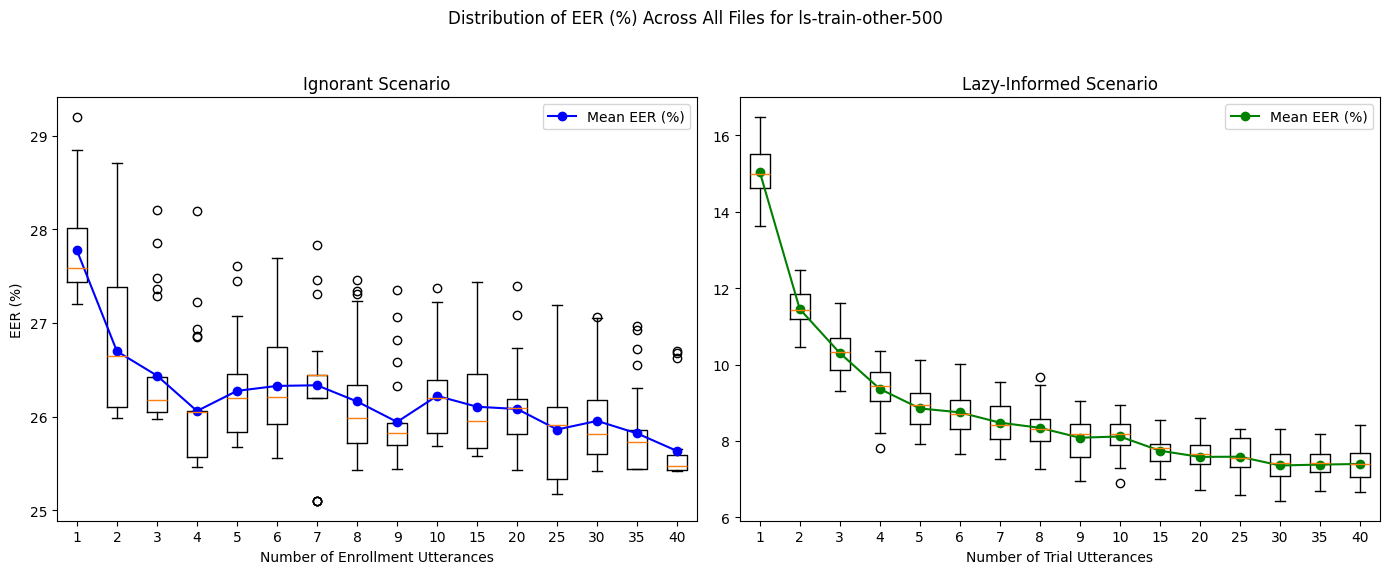

In [72]:
# Plot Box Plots and Mean Lines
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_trials')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index)
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario')
axs[0].set_xlabel('Number of Enrollment Utterances')
axs[0].set_ylabel('EER (%)')
axs[0].legend()

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_trials')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index)
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario')
axs[1].set_xlabel('Number of Trial Utterances')
axs[1].legend()

plt.suptitle('Distribution of EER (%) Across All Files for ls-train-other-500')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

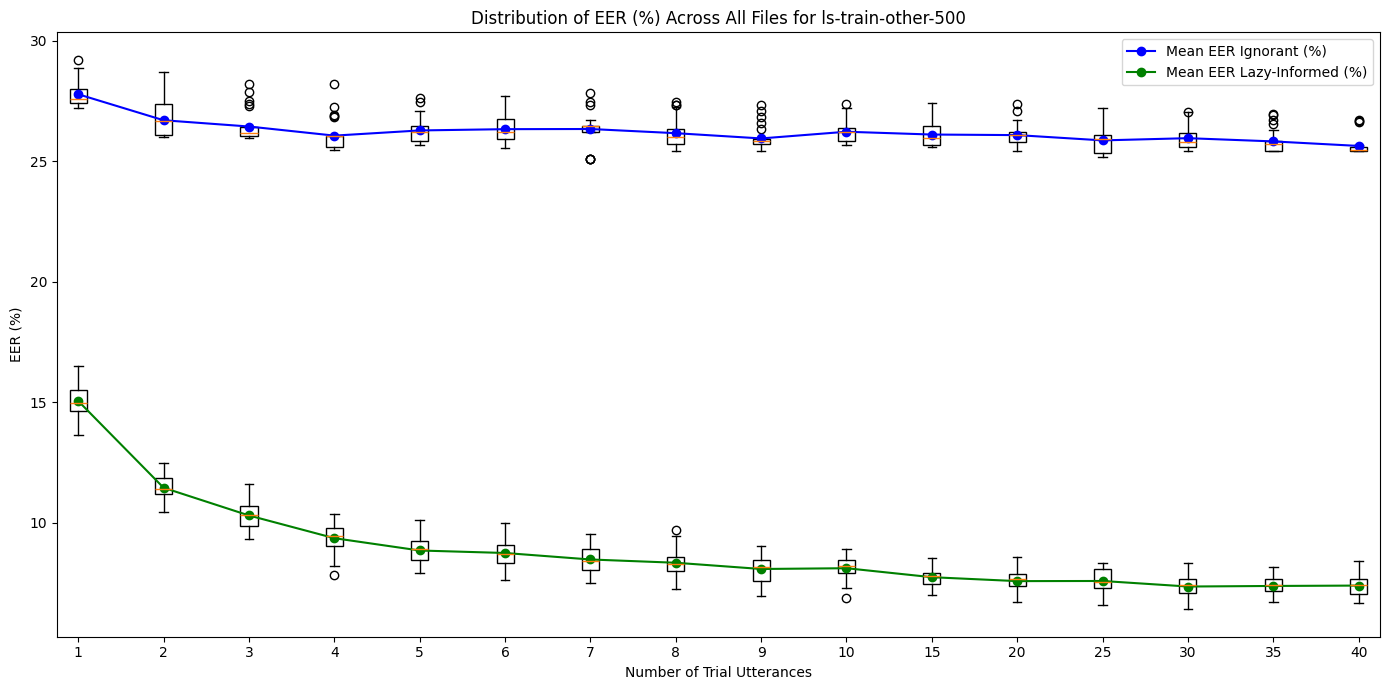

In [73]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_trials')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_trials')['eer_lazy-informed'].mean().values

# Getting unique number of enroll for plotting
unique_enroll = sorted(full_df['num_of_trials'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_trials'] == speaker]['eer_ignorant'].values for speaker in unique_enroll]
lazy_informed_data = [full_df[full_df['num_of_trials'] == speaker]['eer_lazy-informed'].values for speaker in unique_enroll]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_enroll))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_enroll))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_enroll)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-other-500')
ax.set_xlabel('Number of Trial Utterances')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_enroll)
plt.tight_layout()
plt.show()